---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [154]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [135]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
path = 'sbikedata.csv'
data = pd.read_csv(path)
new = pd.read_csv(path)
display(data.head())
display(data.shape)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


(5827, 11)

In [3]:
data.nunique()

date              244
hour               24
PM10              189
PM2.5             110
ozone             109
temperature       377
precipitation       2
windspeed          72
humidity           82
visibility       1032
count             757
dtype: int64

date
2021-04-01    17.717391
2021-04-02    17.475000
2021-04-03    15.537500
2021-04-04    12.020833
2021-04-05    11.766667
                ...    
2021-11-26     2.916667
2021-11-27     3.295833
2021-11-28     4.804167
2021-11-29     7.429167
2021-11-30     7.900000
Name: temperature, Length: 244, dtype: float64

- date : 날짜
- hour : 시간
- PM10 : 미먼
- PM2.5 : 초미먼
- ozone : 오존
- temperature : 온도
- precipitation : 강우여부
- windspeed : 단위시간당평균풍속
- humidity : 습도
- visibility : 기상 상태에 따른 가시성 > (10m단위, 2000이면 20km가 보였다)
- count : 대여량

In [70]:
data.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) :

###### ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
###### ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 대기 질 (미세먼지,초미세먼지,오존)
###### ㅇ 미세먼지 농도와 대여량은 연관성이 없다
###### ㅇ 미세먼지 농도와 대여량은 연관성이 있다

- 가설 3 :
###### ㅇ 초미세먼지 농도와 대여량은 연관성이 없다
###### ㅇ 초미세먼지 농도와 대여량은 연관성이 있다

- 가설 4 :
###### ㅇ 오존 농도와 대여량은 연관성이 없다
###### ㅇ 오존 농도와 대여량은 연관성이 있다

- 가설 5 :
###### ㅇ 온도와 대여량은 연관성이 없다 > 일교차
###### ㅇ 온도와 대여량은 연관성이 잇다

- 가설 6 :
###### ㅇ 시간과 대여량은 연관성이 앖다
###### ㅇ 시간과 대여량은 연관성이 있다

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?
> 데이터 수집 단위

2. 변수가 수치형인지 범주형인지


In [5]:
#변수의 자료형을 확인해보세요.
data['hour'].dtype

dtype('int64')

> `int`, 범주형

3. 변수의 결측치 존재 여부 및 조치방안

In [69]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['hour'].isna().nunique()

1

> 없음

4. 변수의 기초 통계량 확인

In [71]:
#변수의 기초 통계량을 확인해보세요.
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

In [84]:
data['hour'].value_counts()

1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

> 파악할게 없다

7. 추가 분석사항 도출

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

> 단위시간별 온도

2. 변수가 수치형인지 범주형인지


In [86]:
data['temperature'].dtypes

dtype('float64')

> `float` 수치형

3. 변수의 결측치 존재 여부 및 조치방안

4. 변수의 기초 통계량 확인

5. 변수의 분포 확인

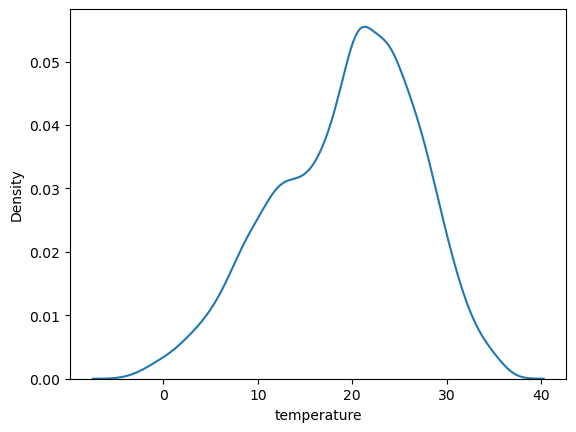

In [101]:
sns.kdeplot(data['temperature'])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

> 4~11월 데이터라서 크게 튀는 값은 없을 것이다

7. 추가 분석사항 도출

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
> 강우여부

2. 변수가 수치형인지 범주형인지


> 범주형 인데 int임

In [149]:
data = data.astype({'precipitation':'str'})
data['precipitation'].dtypes

dtype('O')

3. 변수의 결측치 존재 여부 및 조치방안

4. 변수의 기초 통계량 확인

In [103]:
data['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

5. 변수의 분포 확인

<AxesSubplot:xlabel='precipitation', ylabel='Density'>

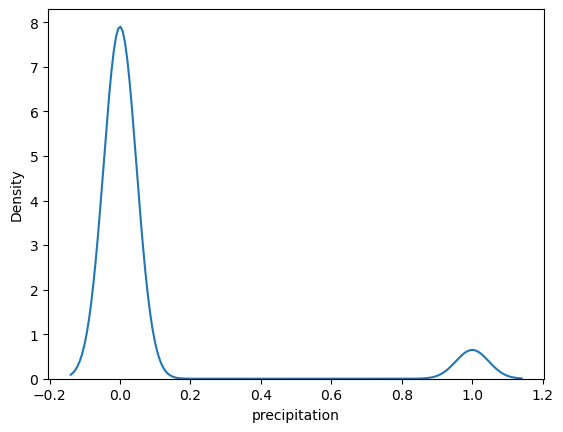

In [106]:
sns.kdeplot(data['precipitation'])

6. 위 정보로 부터 파악한 내용 정리

> 가뭄이구나

7. 추가 분석사항 도출

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [110]:
#변수의 자료형을 확인해보세요.
data['windspeed'].dtypes

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [112]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['windspeed'].isna().nunique()

1

> 없음

4. 변수의 기초 통계량 확인

In [113]:
data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='windspeed', ylabel='Density'>

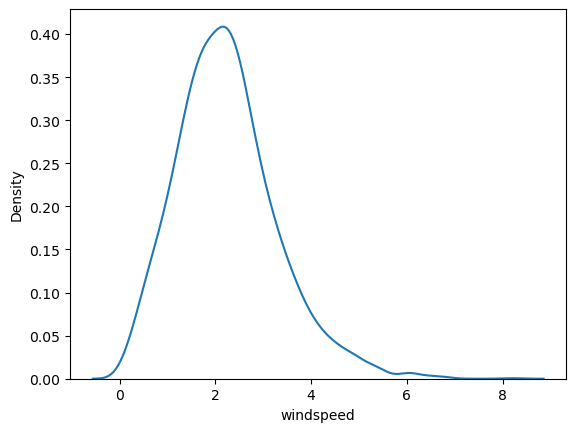

In [114]:
sns.kdeplot(data['windspeed'])

6. 위 정보로 부터 파악한 내용 정리

> 서울은 바람이 안부는구나

7. 추가 분석사항 도출

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도

2. 변수가 수치형인지 범주형인지


> 수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [116]:
data['humidity'].isna().nunique()

1

4. 변수의 기초 통계량 확인

In [117]:
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='humidity'>

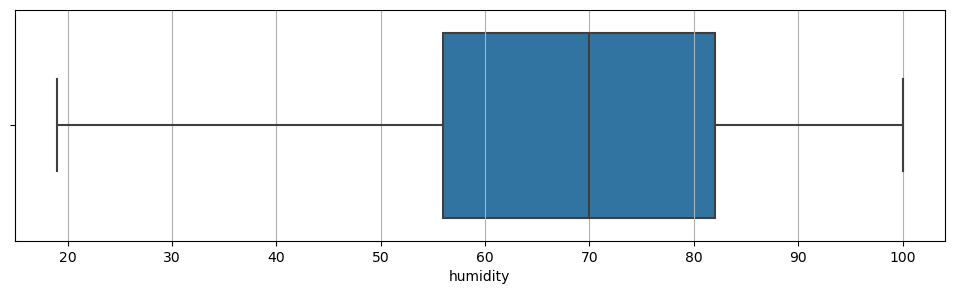

In [122]:
plt.figure(figsize=(12,3))
plt.grid()
sns.boxplot(x=data['humidity'])

6. 위 정보로 부터 파악한 내용 정리

> 다습한 나라구나

7. 추가 분석사항 도출

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

가시성, 단위 10m

2. 변수가 수치형인지 범주형인지


>수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [124]:
data['visibility'].isna().nunique()

1

4. 변수의 기초 통계량 확인

In [127]:
data['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='visibility', ylabel='Density'>

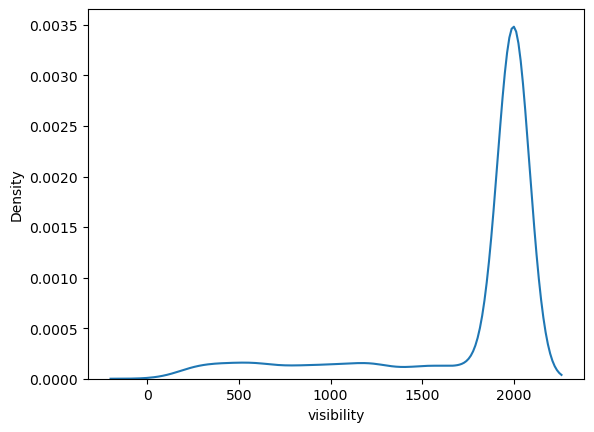

In [126]:
sns.kdeplot(data['visibility'])

6. 위 정보로 부터 파악한 내용 정리

> 대부분은 가시성이 2000(max) 였다. 

7. 추가 분석사항 도출

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


> 수치형이다

3. 변수의 결측치 존재 여부 및 조치방안

In [136]:
data['ozone'].isna().value_counts()

False    5699
True      128
Name: ozone, dtype: int64

> 결측치가 있음, 평균값으로 채워 넣을까 0으로 해야되나

In [139]:
data['ozone'].fillna(data['ozone'].mean()).describe()
ozonena = data[data['ozone'].isnull()]
ozonena

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
540,2021-04-23,13,NaN,NaN,NaN,20.6,0,4.0,33,2000,236
...,...,...,...,...,...,...,...,...,...,...,...
5648,2021-11-22,14,22.0,7.0,NaN,3.0,0,6.2,63,2000,143
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157
5650,2021-11-22,16,49.0,23.0,NaN,3.2,0,6.1,52,2000,155
5651,2021-11-22,17,43.0,19.0,NaN,2.1,0,4.6,56,2000,277


4. 변수의 기초 통계량 확인

In [138]:
data['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

In [44]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [45]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [46]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [47]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [140]:
data['PM10'].fillna(data['PM10'].mean()).describe()
pm10na = data[data['PM10'].isnull()]
pm10na

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.038,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5147,2021-11-01,17,NaN,NaN,NaN,14.8,0,2.6,61,2000,525
5503,2021-11-16,13,NaN,NaN,NaN,12.5,0,2.6,36,2000,227
5504,2021-11-16,14,NaN,NaN,NaN,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,NaN,NaN,NaN,13.3,0,3.3,37,2000,233


4. 변수의 기초 통계량 확인

In [49]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [50]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [51]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [52]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [53]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [141]:
data['PM2.5'].fillna(data['PM2.5'].mean()).describe()
pm2_5na = data[data['PM2.5'].isnull()]
pm2_5na

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.038,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5504,2021-11-16,14,NaN,NaN,NaN,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,NaN,NaN,NaN,13.3,0,3.3,37,2000,233
5506,2021-11-16,16,NaN,NaN,NaN,13.0,0,3.0,41,2000,302
5649,2021-11-22,15,16.0,NaN,NaN,3.0,0,6.1,56,2000,157


4. 변수의 기초 통계량 확인

In [55]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [56]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [57]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [58]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [59]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [60]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [61]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

<AxesSubplot:xlabel='count', ylabel='Density'>

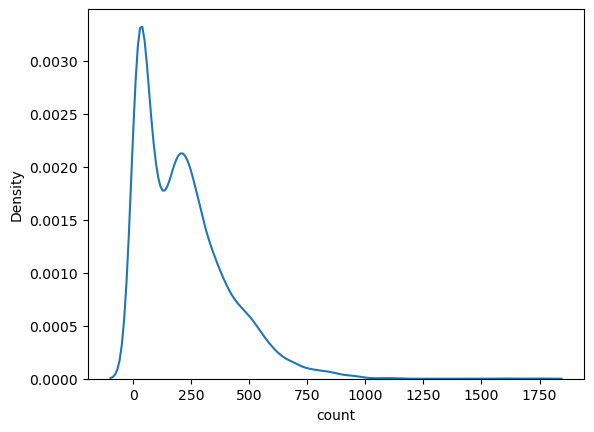

In [150]:
#변수의 분포를 확인해보세요.
sns.kdeplot(data['count'])

6. 위 정보로 부터 파악한 내용 정리

In [63]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

In [ ]:
data['PM10'].fillna(data['PM10'].mean()).describe()
pm10na = data[data['PM10'].isnull()]
pm10na

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [341]:
def list_out(*l):
    return l

def c_to_n(data,feature,target):
    sns.barplot(data=data,x=feature,y=target,)
    plt.axhline(data[target].mean(),color='y')
    plt.show()
    l = []
    for i in range(data[feature].nunique()):
        l.append(data.loc[data[feature]==str(i),target])
    if data[feature].nunique()==2:
        display(spst.ttest_ind(*l))
    elif data[feature].nunique()>2:
        pass
        display(spst.f_oneway(*l))
        print(l)
        print(l[0].shape)

In [300]:
def a(*l):
    return l
print(a(*[1,2,3]))

(1, 2, 3)


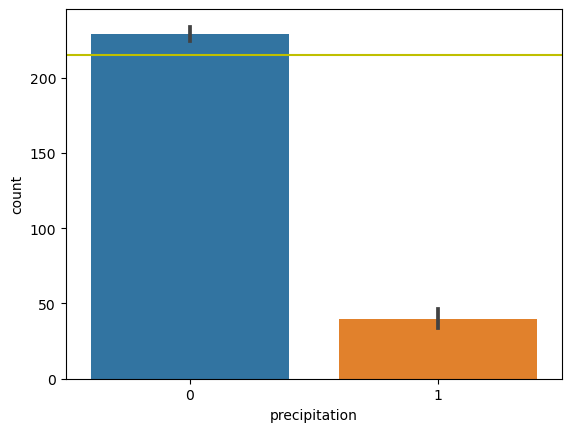

Ttest_indResult(statistic=21.389614151911022, pvalue=8.86239184041254e-98)

In [319]:
feature = 'precipitation'
target = 'count'
c_to_n(data,feature,target)

> 비오는 날에는 count수치가 현저히 낮고 관련성이 높음

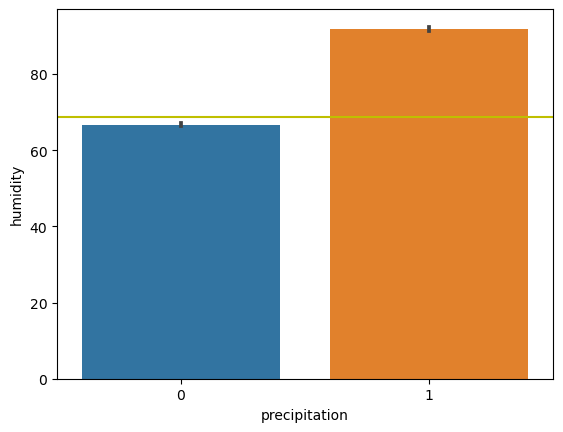

Ttest_indResult(statistic=-31.798633125685747, pvalue=9.309643500829344e-205)

In [357]:
feature = 'precipitation'
target = 'humidity'
c_to_n(data,feature,target)

In [186]:
temp=data.loc[data['precipitation']=='0']

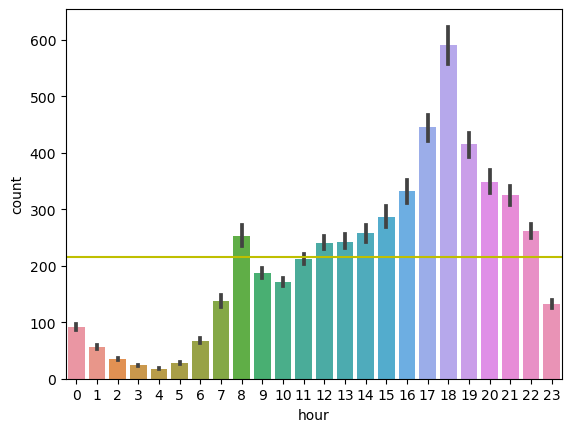

c:\Users\User\anaconda3\envs\jpytorch\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

[Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64)]
(0,)


In [342]:
feature = 'hour'
target = 'count'
c_to_n(data,feature,target)


In [356]:
spst.f_oneway(data['hour'],data['count']) # 왜 피밸류가 0.0인가

F_onewayResult(statistic=6975.06368117458, pvalue=0.0)

In [287]:
data[feature].nunique()

24

In [ ]:
temp.groupby()

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

In [251]:
def reg(data,x,y):
    display(spst.pearsonr(x=data[x],y=data[y]))
    sns.regplot(data=data,x=x,y=y,line_kws={"color": "red"},marker='.')
    plt.grid()
    plt.show()
def fill_na(data,feature):
    nnull_del = data.loc[data[feature].notnull()]
    nnull_mean = data.fillna(data[feature].mean())
    nnull_0 = data.fillna(0)
    return nnull_del,nnull_mean,nnull_0

In [ ]:
def fill_na(data,feature):
    nnull_del = data.loc[data[feature].notnull()]
    nnull_mean = data.fillna(data[feature].mean())
    nnull_0 = data.fillna(0)
    return nnull_del,nnull_mean,nnull_0

#### function interface
feature = ''
target = 'count'
dataframe = temp
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   object 
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 500.9+ KB


2. 시간대별 데이터와 따릉이 대여량간 분석

(0.6322377000391004, 0.0)

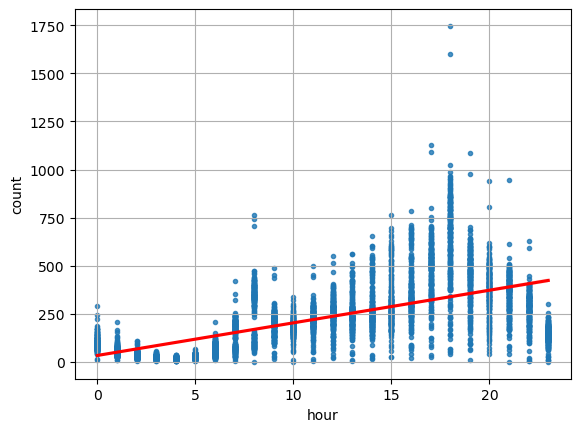

In [242]:
#### function interface
feature = 'hour'
target = 'count'
dataframe = temp
if data['ozone'].isna().nunique()>2:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

3. 온도 데이터와 따릉이 대여량간 분석

(0.2793361161387833, 3.898532733946917e-97)

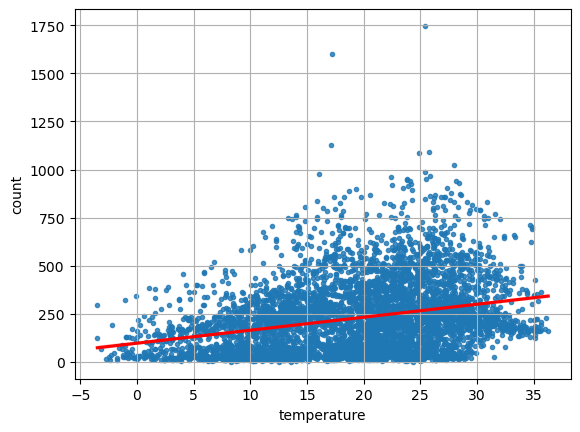

In [241]:
#### function interface
feature = 'temperature'
target = 'count'
dataframe = temp
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

(0.2793361161387833, 3.898532733946917e-97)

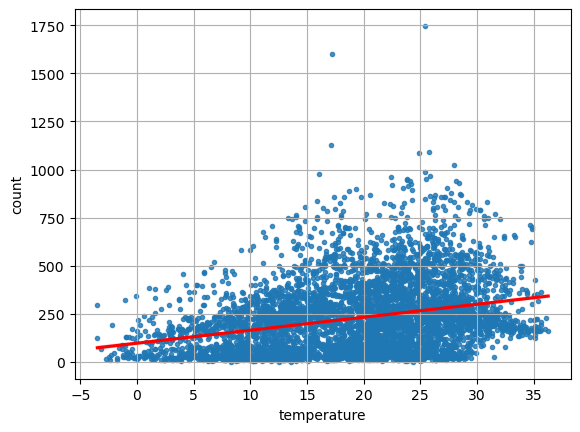

In [215]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
reg(temp,'temperature','count')

4. 풍속 데이터와 따릉이 대여량간 분석

(0.26177915562482934, 4.041960992667824e-85)

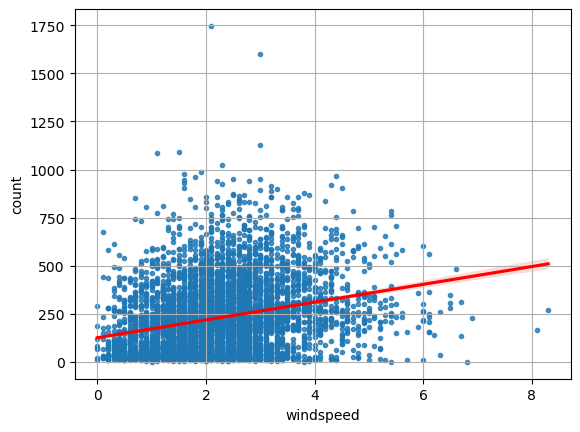

In [239]:
#### function interface
feature = 'windspeed'
target = 'count'
dataframe = temp
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

5. 습도 데이터와 따릉이 대여량간 분석

(-0.42339177873974204, 2.5523586000327206e-233)

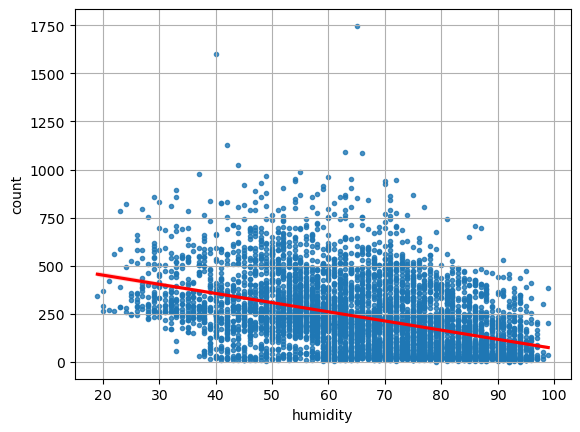

In [293]:
def reg(data,x,y):
    display(spst.pearsonr(x=data[x],y=data[y]))
    sns.regplot(data=data,x=x,y=y,line_kws={"color": "red"},marker='.')
    plt.grid()
    plt.show()

def fill_na(data,feature):
    nnull_del = data.loc[data[feature].notnull()]
    nnull_mean = data.fillna(data[feature].mean())
    nnull_0 = data.fillna(0)
    return nnull_del,nnull_mean,nnull_0

#### function interface
feature = 'humidity'
target = 'count'
dataframe = temp
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

(-0.42339177873974204, 2.5523586000327206e-233)

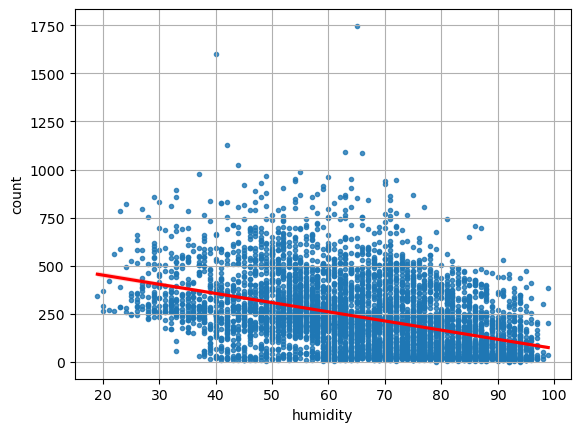

In [292]:
#### function interface
feature = 'humidity'
target = 'count'
dataframe = temp
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

6. 시정 데이터와 따릉이 대여량간 분석

visibility 2000일 때가 많아서
1900 미만일때를 따로 출력해봄


(0.16790438457266277, 4.486920037763594e-08)

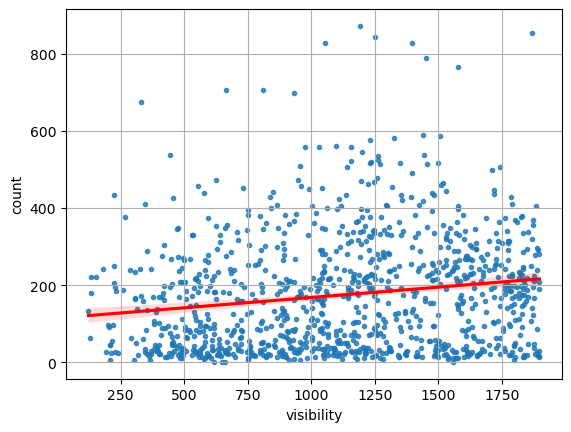

visibility 2000 포함


(0.1560734762761952, 1.0077449184260645e-30)

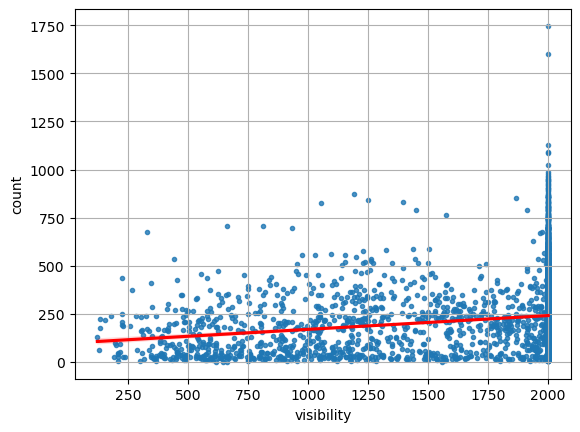

In [336]:
#### function interface
feature = 'visibility'
target = 'count'
dataframe = temp.loc[temp['visibility']<1900]
print("visibility 2000일 때가 많아서")
print("1900 미만일때를 따로 출력해봄")
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)
    print('visibility 2000 포함')
    reg(temp,feature,target)

> visibility == 2000이 너무 많아서 제외시킴

7. 오존 데이터와 따릉이 대여량간 분석

na deleted ozone


(0.3110539991721635, 1.5280981805081951e-118)

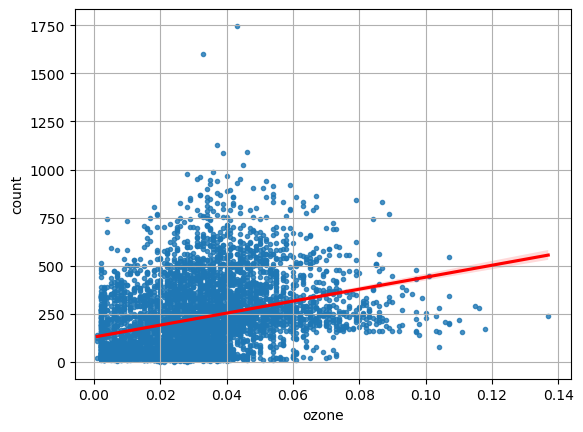

na replace mean ozone


(0.30937147068508253, 7.993421045717822e-120)

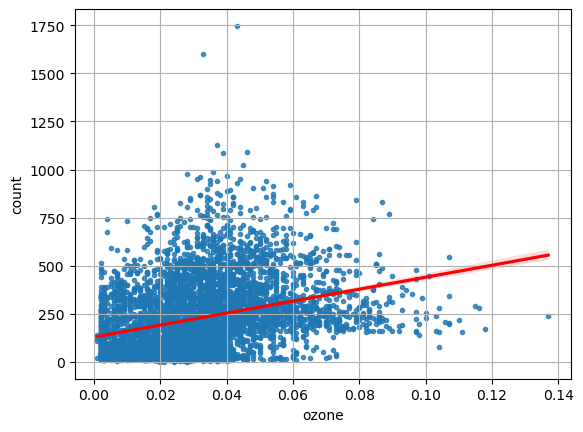

na repace 0 ozone


(0.3072709823304698, 3.7963981542978595e-118)

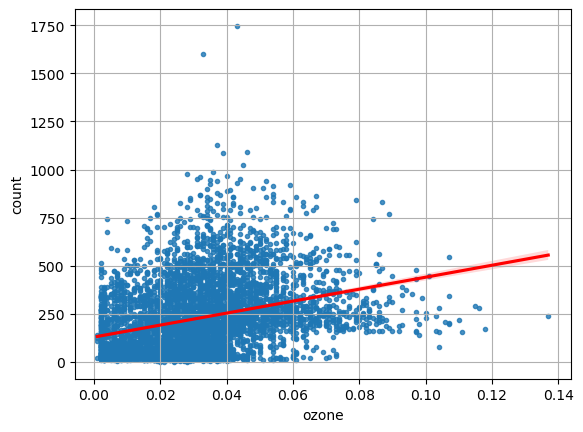

In [236]:
feature = 'ozone'
target = 'count'
dataframe = temp
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

na deleted PM10


(0.0019378285212590814, 0.8878781242688022)

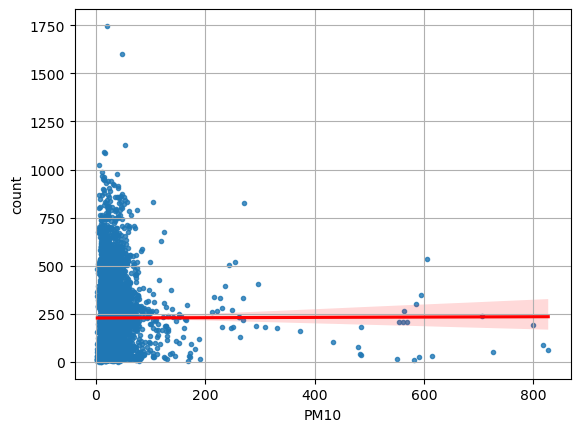

na replace mean PM10


(0.0019276153114785193, 0.8875168984838308)

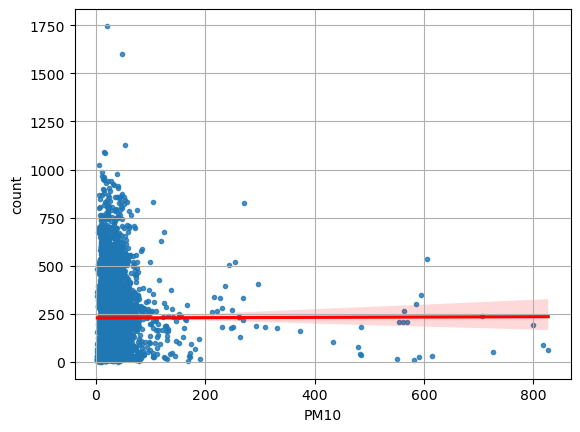

na repace 0 PM10


(0.0015637515647839084, 0.9086457903498314)

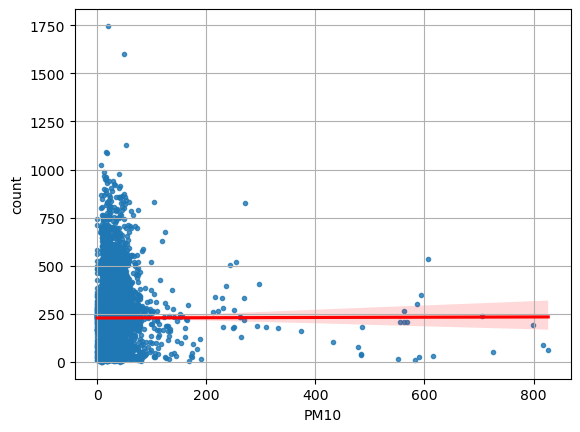

In [324]:
feature = 'PM10'
target = 'count'
del_, mean_, replace0_ = fill_na(temp,feature)
print('na deleted', feature)
reg(del_,feature,target)
print('na replace mean', feature)
reg(mean_,feature,target)
print('na repace 0', feature)
reg(replace0_,feature,target)


9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

na deleted PM2.5


(8.327844924618973e-05, 0.9951642424142153)

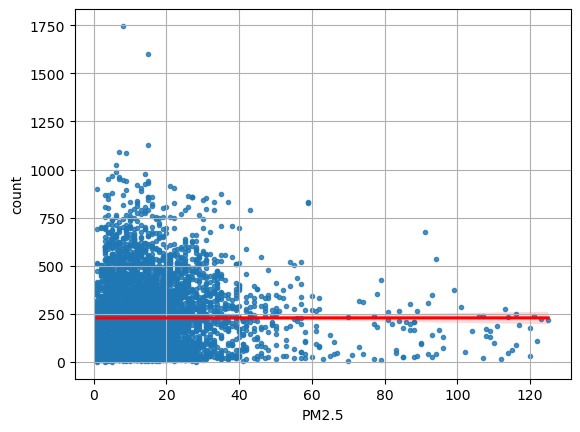

na replace mean PM2.5


(8.291989777071442e-05, 0.9951452280796642)

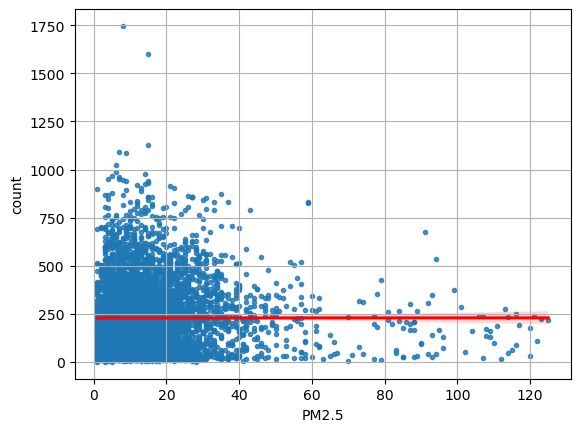

na repace 0 PM2.5


(0.00014687175843101571, 0.9914011050699854)

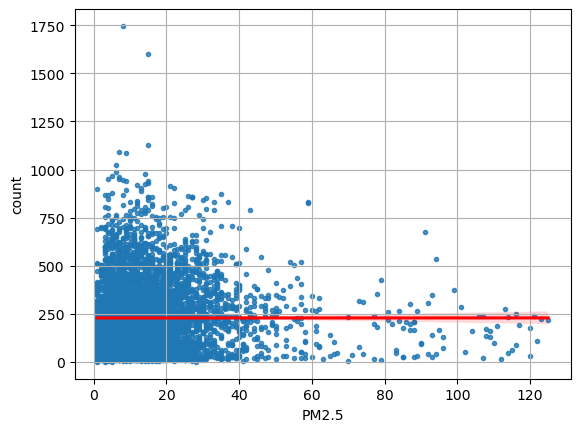

In [217]:
feature = 'PM2.5'
target = 'count'
del_, mean_, replace0_ = fill_na(temp,feature)
print('na deleted', feature)
reg(del_,feature,target)
print('na replace mean', feature)
reg(mean_,feature,target)
print('na repace 0', feature)
reg(replace0_,feature,target)

미세먼지 + 초미세먼지

In [327]:
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다
temp['PM2.5+PM10'] = temp['PM10']+temp['PM2.5']

na deleted PM2.5+PM10


(0.0016505876338419583, 0.9044829999203603)

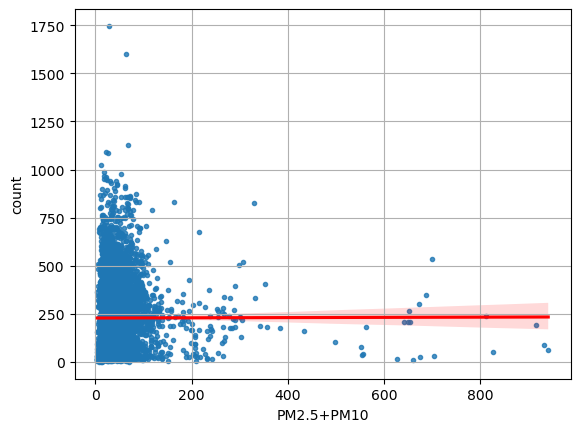

na replace mean PM2.5+PM10


(0.0016412807021401162, 0.9041378795756619)

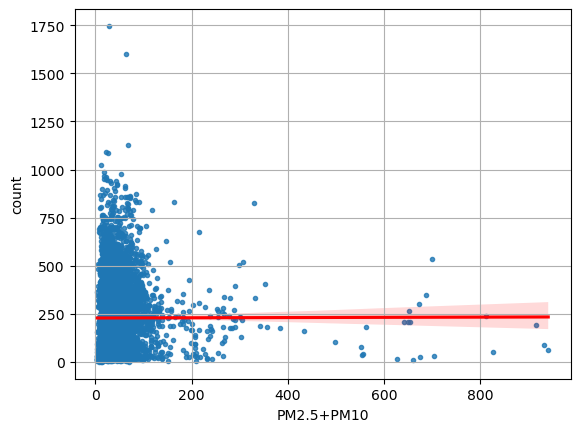

na repace 0 PM2.5+PM10


(0.0010050679200361255, 0.9412084766920388)

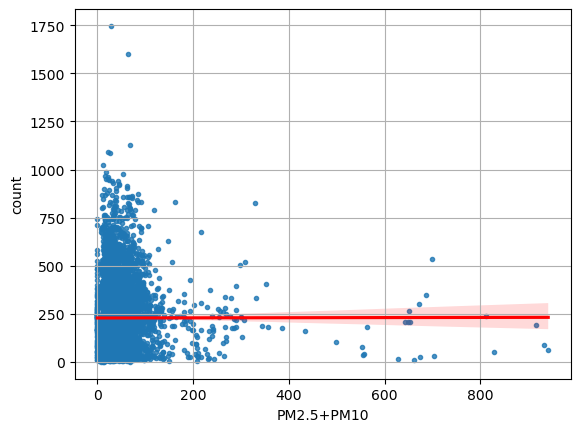

In [328]:
feature = 'PM2.5+PM10'
target = 'count'
del_, mean_, replace0_ = fill_na(temp,feature)
print('na deleted', feature)
reg(del_,feature,target)
print('na replace mean', feature)
reg(mean_,feature,target)
print('na repace 0', feature)
reg(replace0_,feature,target)

In [329]:
temp['PM2.5+PM10+ozone'] = temp['PM2.5+PM10']+temp['ozone']

na deleted PM2.5+PM10+ozone


(0.009534351714844907, 0.49005598458510646)

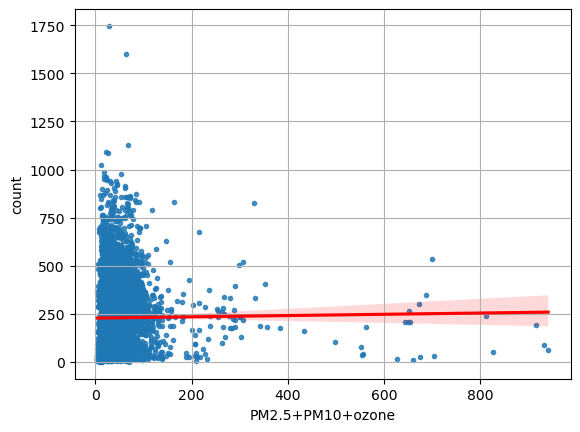

na replace mean PM2.5+PM10+ozone


(0.009458417393168835, 0.4876407091712618)

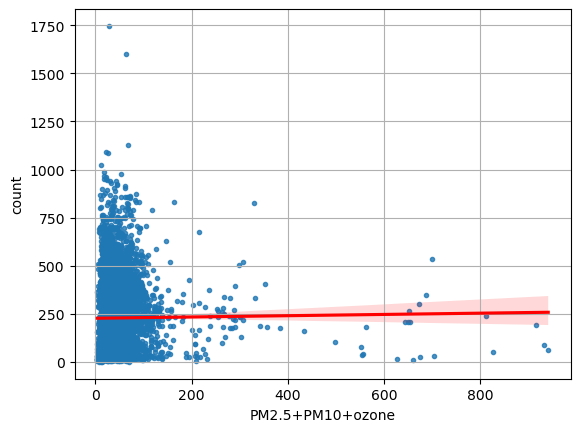

na repace 0 PM2.5+PM10+ozone


(0.012892811477929943, 0.34409610548231423)

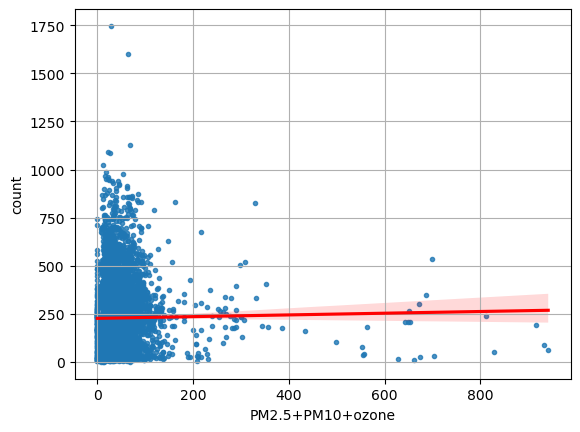

In [330]:
feature = 'PM2.5+PM10+ozone'
target = 'count'
del_, mean_, replace0_ = fill_na(temp,feature)
print('na deleted', feature)
reg(del_,feature,target)
print('na replace mean', feature)
reg(mean_,feature,target)
print('na repace 0', feature)
reg(replace0_,feature,target)

In [331]:
temp['PM2.5+PM10+ozone/hu'] = temp['PM2.5+PM10+ozone']/temp['humidity']

#### function interface
feature = ''
target = 'count'
dataframe = temp
if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

na deleted PM2.5+PM10+ozone/hu


(0.12123102966439853, 1.2674473909517032e-18)

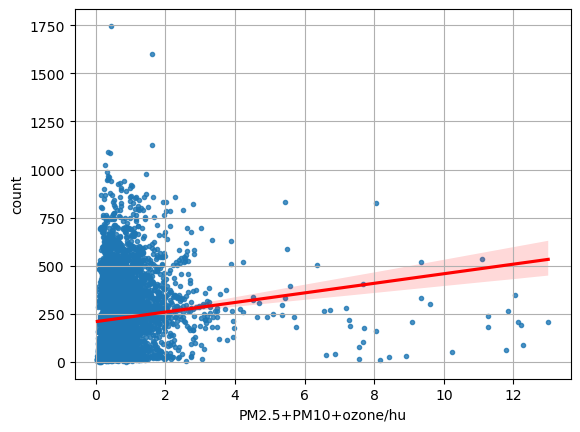

na replace mean PM2.5+PM10+ozone/hu


(0.12026551084581726, 8.208979860643797e-19)

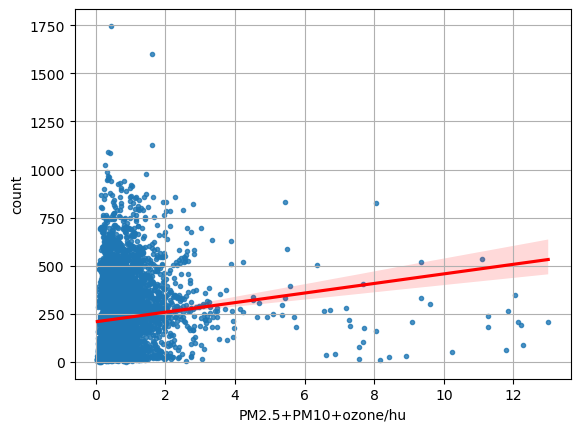

na repace 0 PM2.5+PM10+ozone/hu


(0.12249697066591775, 1.8347374345511902e-19)

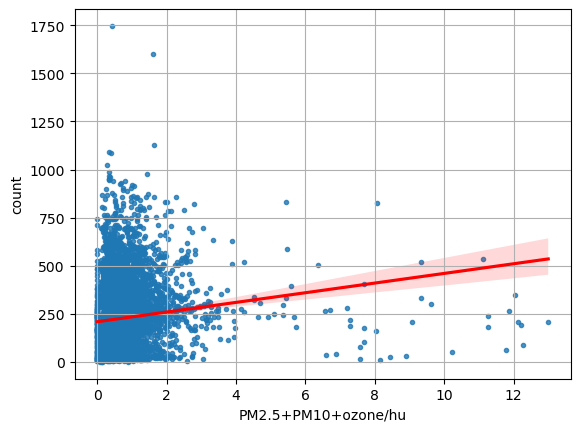

In [332]:
feature = 'PM2.5+PM10+ozone/hu'
target = 'count'
del_, mean_, replace0_ = fill_na(temp,feature)
print('na deleted', feature)
reg(del_,feature,target)
print('na replace mean', feature)
reg(mean_,feature,target)
print('na repace 0', feature)
reg(replace0_,feature,target)

In [ ]:
temp['PM2.5+PM10+ozone*v'] = temp['PM2.5+PM10+ozone']*temp['visibility']

na deleted PM2.5+PM10+ozone*v


(0.12430616151849465, 1.6590119330566008e-19)

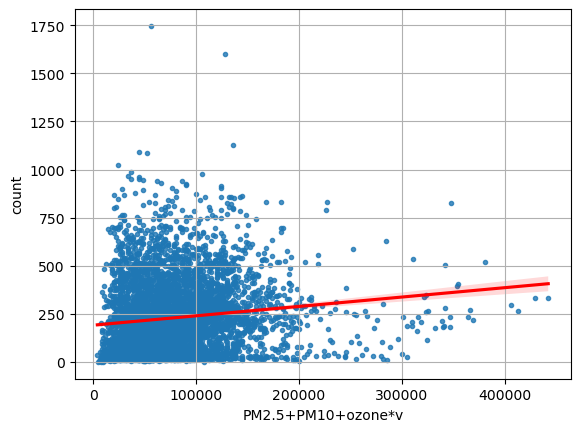

na replace mean PM2.5+PM10+ozone*v


(0.1233161514646004, 1.0511647517801718e-19)

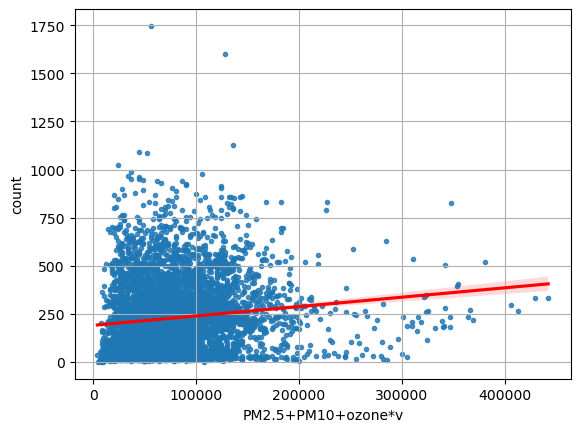

na repace 0 PM2.5+PM10+ozone*v


(0.12537182939646774, 2.5554864642160842e-20)

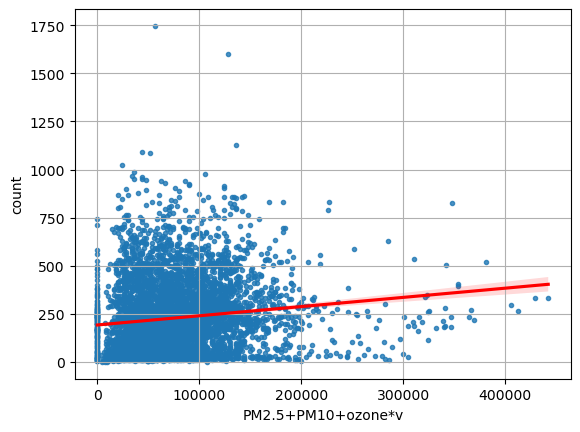

In [334]:
#### function interface
feature = 'PM2.5+PM10+ozone*v'
target = 'count'
dataframe = temp
#dataframe = temp.loc[temp['visibility']<1900]
#print('visibility 2000 제외 ')

if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

visibility 2000 제외 
na deleted PM2.5+PM10+ozone*v


(0.30036709491192776, 1.5897090930763224e-22)

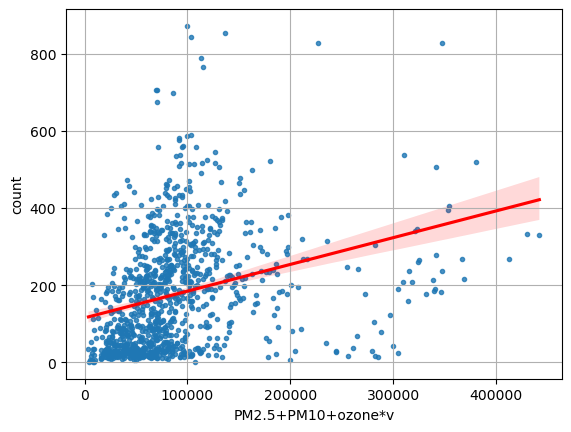

na replace mean PM2.5+PM10+ozone*v


(0.29792148041440786, 6.054303541008324e-23)

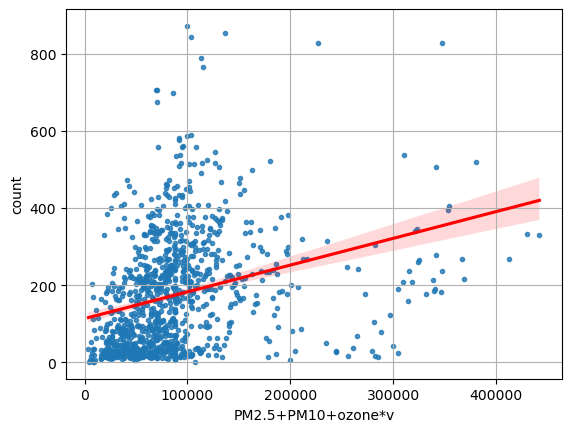

na repace 0 PM2.5+PM10+ozone*v


(0.3041463678632552, 6.859087761573098e-24)

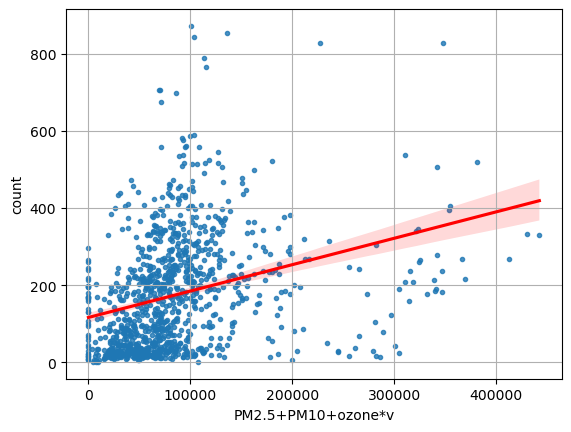

In [335]:
#### function interface
feature = 'PM2.5+PM10+ozone*v'
target = 'count'
dataframe = temp
dataframe = temp.loc[temp['visibility']<1900]
print('visibility 2000 제외 ')

if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    print('na deleted', feature)
    reg(del_,feature,target)
    print('na replace mean', feature)
    reg(mean_,feature,target)
    print('na repace 0', feature)
    reg(replace0_,feature,target)
else:
    reg(dataframe,feature,target)

(0.042557915792748965, 0.0020324283261600293)

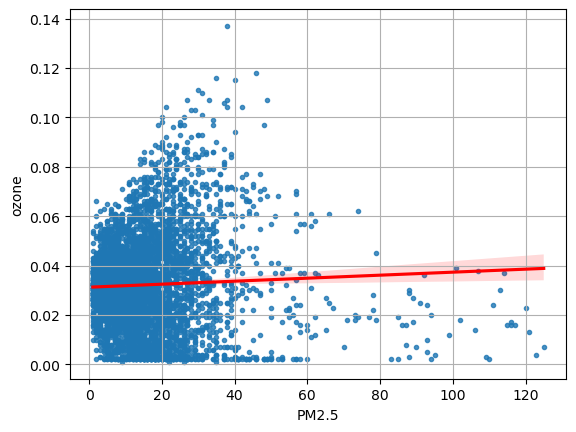

In [355]:
#### function interface
feature = 'PM2.5'
target = 'ozone'
dataframe = temp

if dataframe[feature].isna().nunique()>1:
    del_, mean_, replace0_ = fill_na(dataframe,feature)
    del_, mean_, replace0_ = fill_na(del_,target)
    reg(del_,feature,target)
else:
    reg(dataframe,feature,target)

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출

<AxesSubplot:>

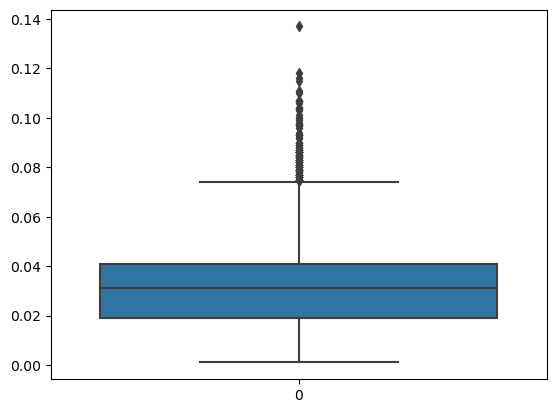

In [361]:
sns.boxplot(data['ozone'])

In [362]:
data['ozone'].max()

0.137

In [363]:
data['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64